In [3]:
### IMPORT
import os
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
### define constant parameter
INPUT_FOLDER = "./input"
FILE_2_STUDY = "M07_1.csv"

In [5]:
### helper function

In [16]:
### opening One file

raw_df = pd.read_csv(os.path.join(os.path.join(os.getcwd(),INPUT_FOLDER),FILE_2_STUDY))

    

In [17]:

display(raw_df.info()) #-> Columns name looks more like a file name ...  
display(raw_df.head(3)) # -> first column is bodypart of the mouse
display(set(raw_df.head(3).iloc[0])) # those are the body parts (we can define a decoder base on that ...) 'Center','LEar','LLCorner','LRCorner','Nose','REar','Tail','ULCorner','URCorner',
display(set(raw_df.head(3).iloc[1])) # every body part has x y position and a "likehood"


### general conclusion, we first column not useful, with those information, we can measure displacement of the mouse, but we might also be able to see his spatial distribution 



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16287 entries, 0 to 16286
Data columns (total 28 columns):
 #   Column                                               Non-Null Count  Dtype 
---  ------                                               --------------  ----- 
 0   scorer                                               16287 non-null  object
 1   DLC_resnet50_Psychedelic_miceJan7shuffle1_250000     16287 non-null  object
 2   DLC_resnet50_Psychedelic_miceJan7shuffle1_250000.1   16287 non-null  object
 3   DLC_resnet50_Psychedelic_miceJan7shuffle1_250000.2   16287 non-null  object
 4   DLC_resnet50_Psychedelic_miceJan7shuffle1_250000.3   16287 non-null  object
 5   DLC_resnet50_Psychedelic_miceJan7shuffle1_250000.4   16287 non-null  object
 6   DLC_resnet50_Psychedelic_miceJan7shuffle1_250000.5   16287 non-null  object
 7   DLC_resnet50_Psychedelic_miceJan7shuffle1_250000.6   16287 non-null  object
 8   DLC_resnet50_Psychedelic_miceJan7shuffle1_250000.7   16287 non-null  object


None

,scorer,DLC_resnet50_Psychedelic_miceJan7shuffle1_250000,DLC_resnet50_Psychedelic_miceJan7shuffle1_250000.1,DLC_resnet50_Psychedelic_miceJan7shuffle1_250000.2,DLC_resnet50_Psychedelic_miceJan7shuffle1_250000.3,DLC_resnet50_Psychedelic_miceJan7shuffle1_250000.4,DLC_resnet50_Psychedelic_miceJan7shuffle1_250000.5,DLC_resnet50_Psychedelic_miceJan7shuffle1_250000.6,DLC_resnet50_Psychedelic_miceJan7shuffle1_250000.7,DLC_resnet50_Psychedelic_miceJan7shuffle1_250000.8,...,DLC_resnet50_Psychedelic_miceJan7shuffle1_250000.17,DLC_resnet50_Psychedelic_miceJan7shuffle1_250000.18,DLC_resnet50_Psychedelic_miceJan7shuffle1_250000.19,DLC_resnet50_Psychedelic_miceJan7shuffle1_250000.20,DLC_resnet50_Psychedelic_miceJan7shuffle1_250000.21,DLC_resnet50_Psychedelic_miceJan7shuffle1_250000.22,DLC_resnet50_Psychedelic_miceJan7shuffle1_250000.23,DLC_resnet50_Psychedelic_miceJan7shuffle1_250000.24,DLC_resnet50_Psychedelic_miceJan7shuffle1_250000.25,DLC_resnet50_Psychedelic_miceJan7shuffle1_250000.26
0,bodyparts,ULCorner,ULCorner,ULCorner,URCorner,URCorner,URCorner,Center,Center,Center,...,LEar,REar,REar,REar,Nose,Nose,Nose,Tail,Tail,Tail
1,coords,x,y,likelihood,x,y,likelihood,x,y,likelihood,...,likelihood,x,y,likelihood,x,y,likelihood,x,y,likelihood
2,0,140.22738647460938,150.78033447265625,0.7487231492996216,995.6226196289062,179.88955688476562,0.857924222946167,573.2000122070312,717.9576416015625,0.06815990805625916,...,0.9999293088912964,602.0404663085938,751.0010375976562,0.9997832179069519,525.6760864257812,212.965576171875,0.9997888207435608,597.4900512695312,607.4349975585938,0.38912972807884216


{'Center',
 'LEar',
 'LLCorner',
 'LRCorner',
 'Nose',
 'REar',
 'Tail',
 'ULCorner',
 'URCorner',
 'bodyparts'}

{'coords', 'likelihood', 'x', 'y'}

In [18]:
### We reload the dataframe with the correct parameter and verify that everything is fine

raw_df = pd.read_csv(os.path.join(os.path.join(os.getcwd(),INPUT_FOLDER),FILE_2_STUDY),skiprows=1,header=[0,1])
display(raw_df.head(3))
display(raw_df.columns)

bodyparts    ULCorner                           URCorner              \
     coords           x           y likelihood           x           y   
0         0  140.227386  150.780334   0.748723  995.622620  179.889557   
1         1  139.399673  150.943848   0.576387  995.662109  177.808701   
2         2  137.658554  149.504181   0.729678  996.360352  176.674011   

                   Center                         ...       LEar        REar  \
  likelihood            x           y likelihood  ... likelihood           x   
0   0.857924   573.200012  717.957642   0.068160  ...   0.999929  602.040466   
1   0.936346  1000.772339  181.394669   0.025486  ...   0.999928  598.544495   
2   0.935480   999.675110  176.574524   0.047184  ...   0.997900  598.699707   

                                Nose                               Tail  \
            y likelihood           x           y likelihood           x   
0  751.001038   0.999783  525.676086  212.965576   0.999789  597.490051   
1  746.622192   0.999841  517.544678  206.250198   0.999743  314.605927   
2  746.176575   0.999902  603.148804  791.791504   0.999301  594.297485   

                          
            y likelihood  
0  607.434998    0.38913  
1  229.438873    0.98160  
2  599.547424    0.43080  

[3 rows x 28 columns]

MultiIndex([('bodyparts',     'coords'),
            ( 'ULCorner',          'x'),
            ( 'ULCorner',          'y'),
            ( 'ULCorner', 'likelihood'),
            ( 'URCorner',          'x'),
            ( 'URCorner',          'y'),
            ( 'URCorner', 'likelihood'),
            (   'Center',          'x'),
            (   'Center',          'y'),
            (   'Center', 'likelihood'),
            ( 'LLCorner',          'x'),
            ( 'LLCorner',          'y'),
            ( 'LLCorner', 'likelihood'),
            ( 'LRCorner',          'x'),
            ( 'LRCorner',          'y'),
            ( 'LRCorner', 'likelihood'),
            (     'LEar',          'x'),
            (     'LEar',          'y'),
            (     'LEar', 'likelihood'),
            (     'REar',          'x'),
            (     'REar',          'y'),
            (     'REar', 'likelihood'),
            (     'Nose',          'x'),
            (     'Nose',          'y'),
            (   

,ULCorner,URCorner,Center,LLCorner,LRCorner,LEar,REar,Nose,Tail
,likelihood,likelihood,likelihood,likelihood,likelihood,likelihood,likelihood,likelihood,likelihood
0,0.748723,0.857924,0.068160,0.020750,0.997411,0.999929,0.999783,0.999789,0.389130
1,0.576387,0.936346,0.025486,0.020172,0.998235,0.999928,0.999841,0.999743,0.981600
2,0.729678,0.935480,0.047184,0.020320,0.998576,0.997900,0.999902,0.999301,0.430800
3,0.933359,0.975404,0.772812,0.030956,0.998519,0.999911,0.999965,0.999912,0.215790
4,0.923508,0.990228,0.685078,0.030446,0.998585,0.999894,0.999996,0.999897,0.330604
...,...,...,...,...,...,...,...,...,...
16280,0.999424,0.999637,0.991344,0.014457,0.997486,0.999942,0.993872,0.985745,0.999785
16281,0.999432,0.999720,0.980171,0.013141,0.998830,0.999958,0.976548,0.925900,0.999860
16282,0.999351,0.999556,0.993819,0.013546,0.998342,0.999962,0.987465,0.961612,0.999806


,ULCorner,URCorner,Center,LLCorner,LRCorner,LEar,REar,Nose,Tail
,likelihood,likelihood,likelihood,likelihood,likelihood,likelihood,likelihood,likelihood,likelihood
count,16285.000000,16285.000000,16285.000000,16285.000000,16285.000000,16285.000000,16285.000000,16285.000000,16285.000000
mean,0.968194,0.987911,0.968047,0.076773,0.988467,0.995254,0.989884,0.988756,0.956271
std,0.147194,0.078343,0.110789,0.115673,0.092429,0.021389,0.054713,0.049209,0.175184
min,0.007736,0.005286,0.008297,0.002363,0.003827,0.582976,0.033901,0.118335,0.010672
25%,0.998097,0.998711,0.982018,0.013263,0.997503,0.999690,0.999381,0.997084,0.999685
50%,0.998949,0.999045,0.991874,0.025870,0.998031,0.999941,0.999883,0.999728,0.999912
75%,0.999355,0.999276,0.995723,0.085198,0.998439,0.999980,0.999962,0.999936,0.999969
max,0.999890,0.999792,0.999570,0.892331,0.999597,1.000000,0.999999,0.999999,0.999999


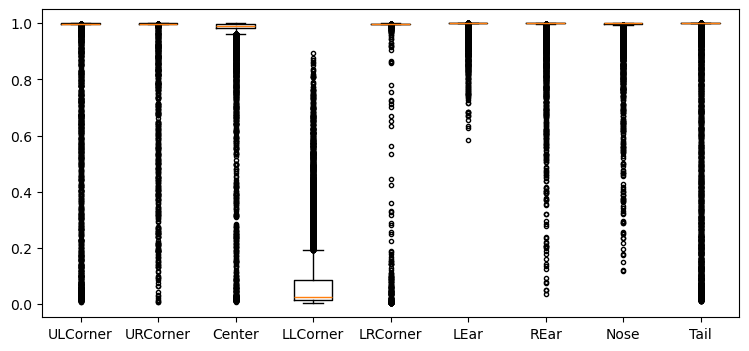

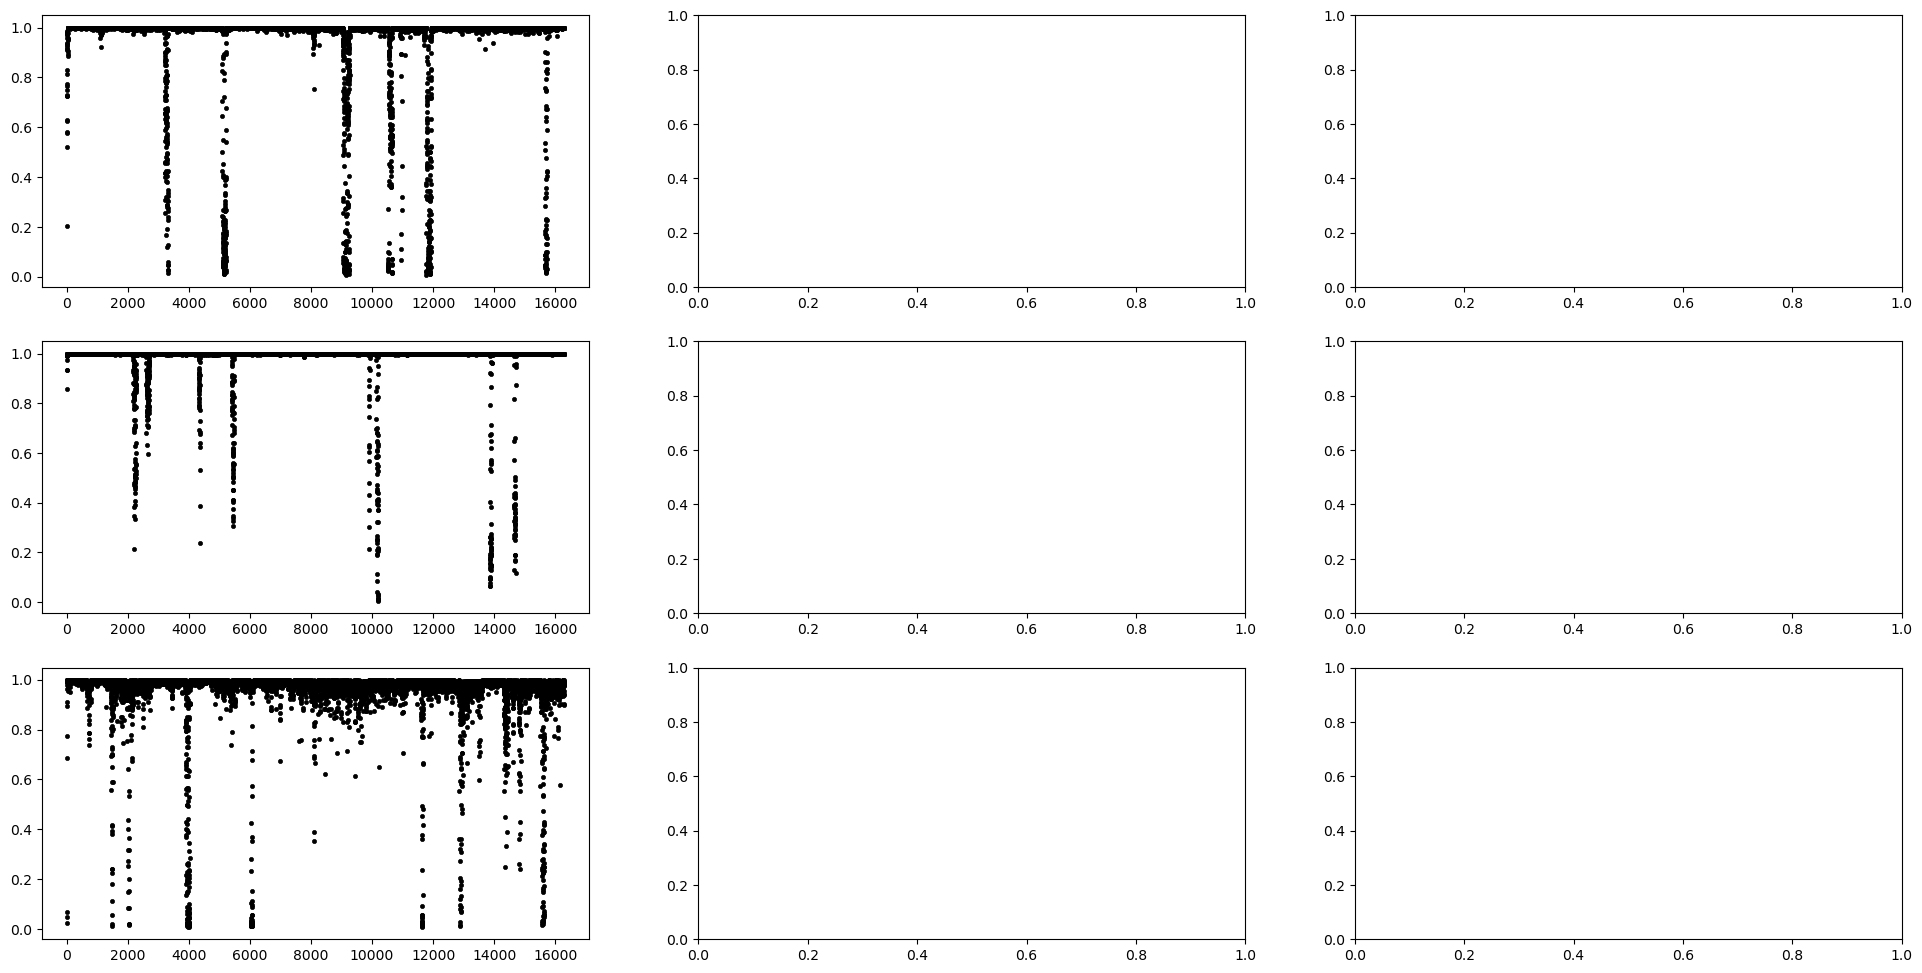

In [20]:
### First question is how reliable are the data? Is there a body part more hard to follow than other ?
### lets select columns with likelihood

columns_2_select = [col for col in raw_df.columns if col[1] == "likelihood"]

selected_df = raw_df[columns_2_select].copy()
display(selected_df)
display(selected_df.describe()) 
# -> LLCorner seem unreliable in general
# -> there is some low likelihood value for every body part

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(9, 4))
ax.boxplot(selected_df,sym=".")
ax.set_xticks([y + 1 for y,col in enumerate(columns_2_select)],labels=[x[0] for x in columns_2_select])

plt.show()
### conclusion, there are unreliable point for every column, LLcorner is definitively worse

fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(24, 12))
ax[0][0].scatter(selected_df["ULCorner"].index,selected_df["ULCorner"],marker=".",linewidths=0.5,c="black")
ax[1][0].scatter(selected_df["URCorner"].index,selected_df["URCorner"],marker=".",linewidths=0.5,c="black")
ax[2][0].scatter(selected_df["Center"].index,selected_df["Center"],marker=".",linewidths=0.5,c="black")
#ax.set_xticks([y + 1 for y,col in enumerate(columns_2_select)],labels=[x[0] for x in columns_2_select])

plt.show()



In [ ]:
display(type(test))

pandas.core.frame.DataFrame

In [12]:
import pickle
import os
with open(os.path.join(".\\test","df_summary"),"rb") as fid:
    df = pickle.loads(fid.read())

with open(os.path.join(".\\test","df_summary_sns"),"rb") as fid:
    df_sns = pickle.loads(fid.read())

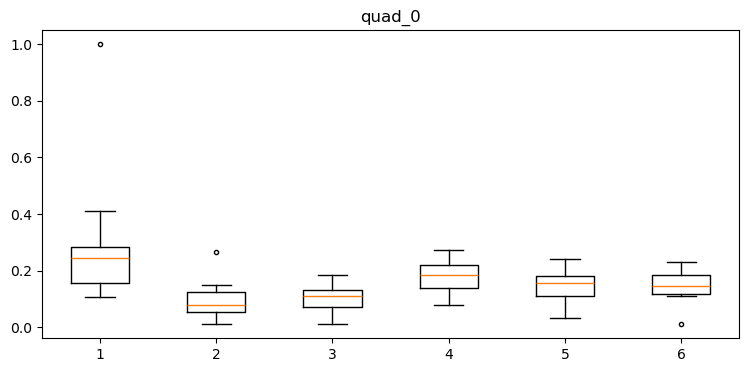

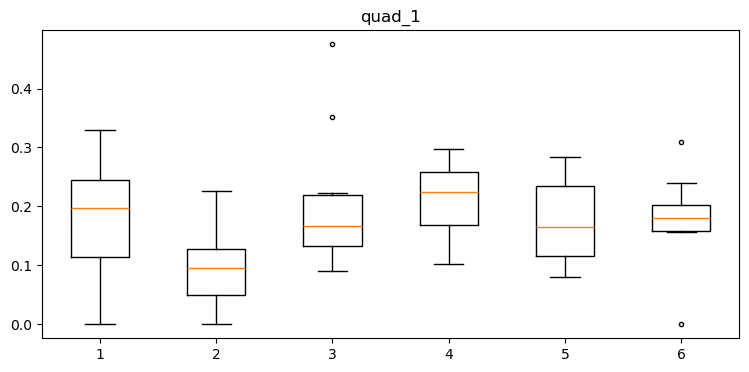

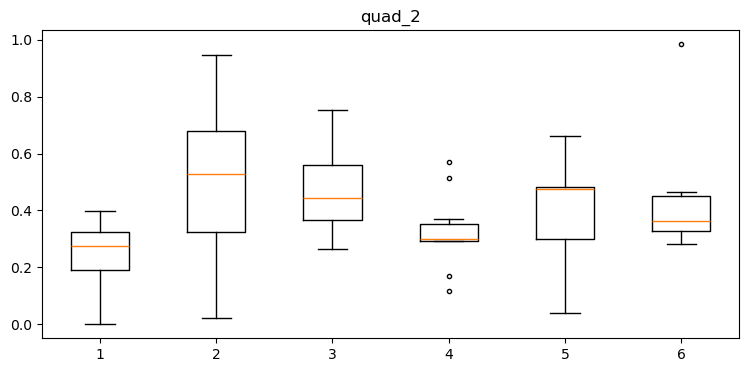

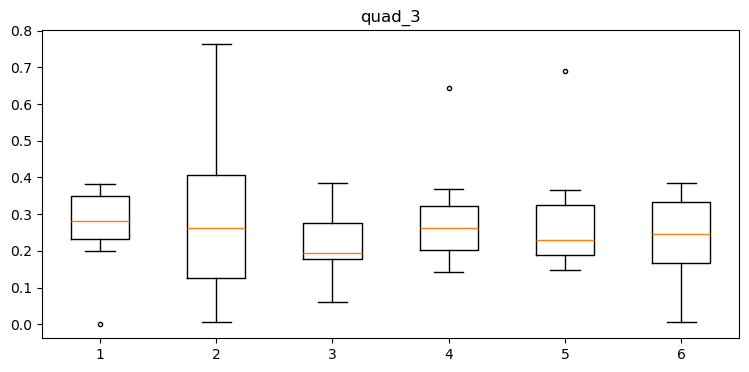

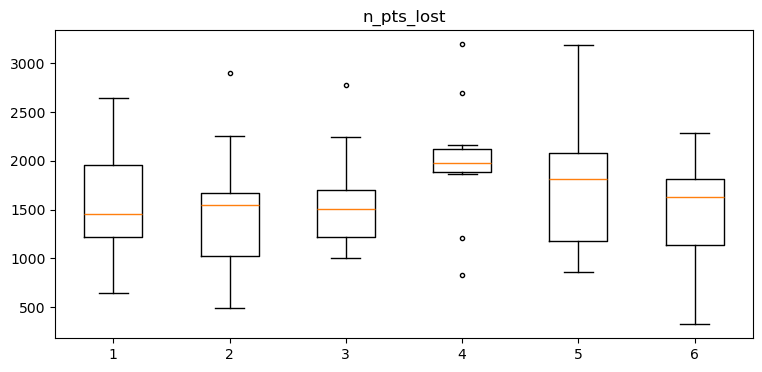

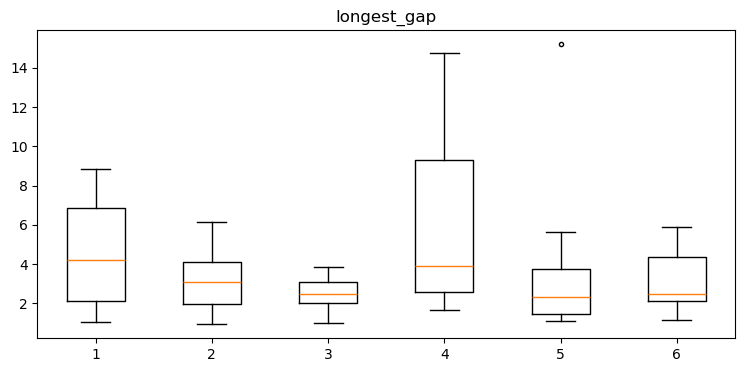

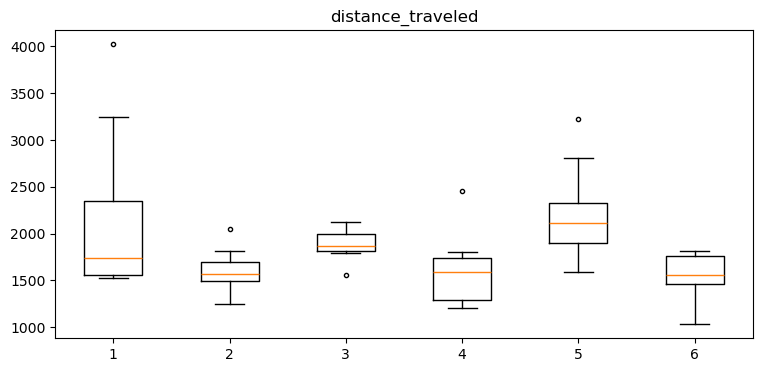

In [44]:
df_aggreg  = {}

df_aggreg = {col : df.pivot(index="mouse_no",columns="group",values=col) for col in df.columns if col not in ['mouse_no','group']}

for key,value in df_aggreg.items():
    frame = [value[t].dropna() for t in value.columns]
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(9, 4))
    ax.boxplot(frame,sym=".")
    plt.title(key)
    plt.show()


